In [3]:
# Import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx # network analysis
# Set the working directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nashville-meetup/rsvps.csv
/kaggle/input/nashville-meetup/member-edges.csv
/kaggle/input/nashville-meetup/meta-events.csv
/kaggle/input/nashville-meetup/member-to-group-edges.csv
/kaggle/input/nashville-meetup/meta-members.csv
/kaggle/input/nashville-meetup/meta-groups.csv
/kaggle/input/nashville-meetup/group-edges.csv


Import the dataset as a graph using NetworkX

In [4]:
df = pd.read_csv('/kaggle/input/nashville-meetup/group-edges.csv')
g = nx.from_pandas_edgelist(df, source='group1', target='group2', edge_attr='weight')

print("The member graph has {} nodes and {} edges".format(len(g.nodes), len(g.edges)))

The member graph has 456 nodes and 6692 edges


In [6]:
# Reading member metadata
groups = pd.read_csv('/kaggle/input/nashville-meetup/meta-groups.csv', index_col='group_id')
print('There are {} groups in metadata'.format(groups.shape[0]))

# Trimming metadata down to only those in graph
groups = groups.loc[[x for x in g.nodes]]
print('After trimming, there are {} groups in metadata'.format(groups.shape[0]))

groups.head(10)

There are 602 groups in metadata
After trimming, there are 456 groups in metadata


,group_name,num_members,category_id,category_name,organizer_id,group_urlname
group_id,,,,,,
19292162,Nashville CocoaHeads,237,34,Tech,145632652,Nashville-CocoaHeads
535553,Nash.rb,881,34,Tech,14344641,nashrb
19194894,Nashville Christian Technologists and Entrepre...,613,34,Tech,193181718,Nashville-Christian-Technologists-and-Entrepre...
19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
18850080,NashReact,438,34,Tech,10083866,NashReact-Meetup
1728035,WordPress Nashville,1643,34,Tech,72560962,NashvilleWordpress
22817838,freeCodeCamp Nashville,434,34,Tech,7534345,freeCodeCamp-Nashville
19997487,Developer Launchpad Nashville,576,34,Tech,82204922,Developer-Launchpad-Nashville
18855476,Savvy Coders - Nashville,243,34,Tech,197929760,SavvyCoders


In [7]:
# Adding other attributes to the dataset
groups['degree'] = pd.Series(dict(nx.degree(g)))
groups['clustering'] = pd.Series(nx.clustering(g))
groups['centrality'] = pd.Series(nx.betweenness_centrality(g))

# Calculating path length
avg_length_dict = {}
for node, path_lengths in nx.shortest_path_length(g):
    path_lengths = [x for x in path_lengths.values()]
    avg_length_dict[node] = np.mean(path_lengths)
groups['path_length'] = pd.Series(avg_length_dict)

groups.head(10)

,group_name,num_members,category_id,category_name,organizer_id,group_urlname,degree,clustering,centrality,path_length
group_id,,,,,,,,,,
19292162,Nashville CocoaHeads,237,34,Tech,145632652,Nashville-CocoaHeads,37,0.692192,0.000255,2.144737
535553,Nash.rb,881,34,Tech,14344641,nashrb,65,0.559615,0.002608,2.028509
19194894,Nashville Christian Technologists and Entrepre...,613,34,Tech,193181718,Nashville-Christian-Technologists-and-Entrepre...,55,0.561616,0.001333,2.133772
19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance,182,0.171635,0.073161,1.642544
18850080,NashReact,438,34,Tech,10083866,NashReact-Meetup,55,0.602020,0.000998,2.164474
1728035,WordPress Nashville,1643,34,Tech,72560962,NashvilleWordpress,109,0.353041,0.011229,1.848684
22817838,freeCodeCamp Nashville,434,34,Tech,7534345,freeCodeCamp-Nashville,40,0.721795,0.000516,2.129386
19997487,Developer Launchpad Nashville,576,34,Tech,82204922,Developer-Launchpad-Nashville,81,0.459568,0.005009,1.949561
18855476,Savvy Coders - Nashville,243,34,Tech,197929760,SavvyCoders,29,0.692118,0.000209,2.315789


Visualizing the dataset

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

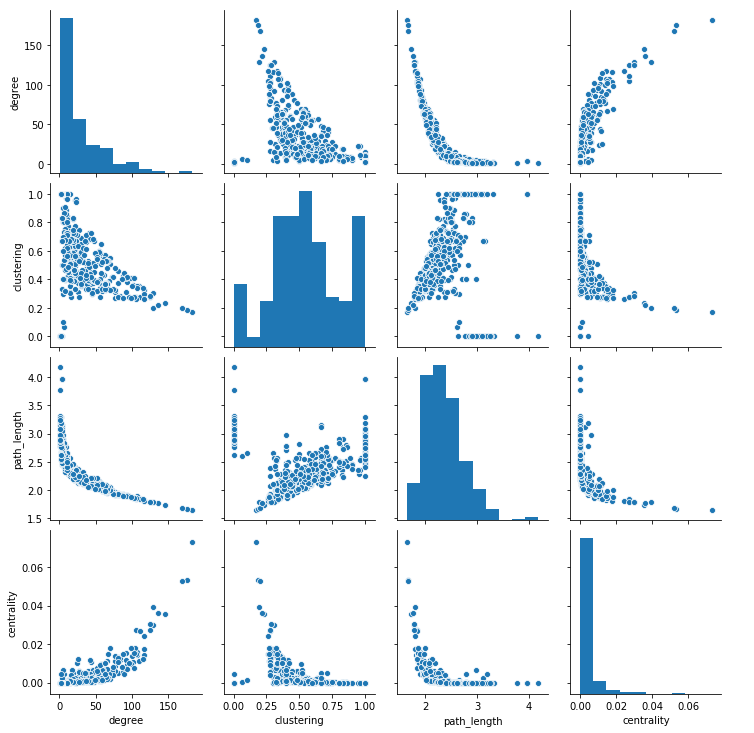

In [10]:
# Correlation between the generated variables
grid = sns.pairplot(groups[['degree', 'clustering', 'path_length', 'centrality']])

plt.show()

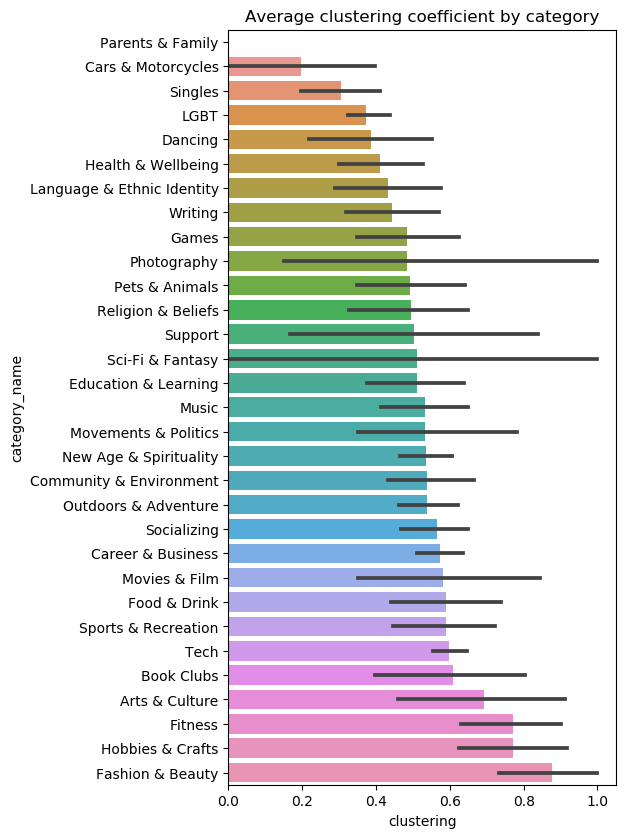

In [11]:
# Clustering
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=100)

sns.barplot(data=groups, x='clustering', y='category_name', order=groups.groupby('category_name').clustering.mean().sort_values().index)
ax.set_title("Average clustering coefficient by category")

plt.show()

(0, 7000)

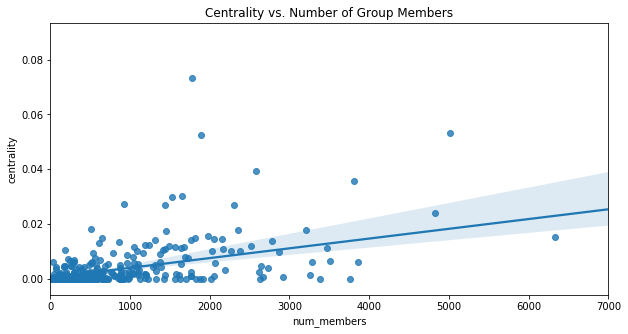

In [15]:
# Number of members vs. centrality
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.regplot(data=groups, x='num_members', y='centrality')
ax.set_title('Centrality vs. Number of Group Members')
ax.set_xlim([0, 7000])

In [17]:
print("The twenty most central groups are: ")
print(groups.sort_values(by='centrality', ascending=False).group_name.head(20))

The twenty most central groups are: 
group_id
19728145                     Stepping Out Social Dance Meetup
18955830                                        Eat Love Nash
1187715                                         What the Pho!
18243826                                Middle TN 40+ singles
339011                                Nashville Hiking Meetup
18506072                                     20s in Nashville
1776274     Nashville SEO & Internet Marketing, Over 1,600...
4126912                        Nashville Online Entrepreneurs
11077852                            Sunday Assembly Nashville
4705492      WOMEN "Word of Mouth Entrepreneurial Networkers"
19266390               Nashville Networking Business Luncheon
1585196                                Tennessee Hiking Group
18425641                   Greater Nashville Networking Group
1324203                              Nashville Psychic Meetup
18562307                 Nashville Young Professionals Meetup
1358081             Nash

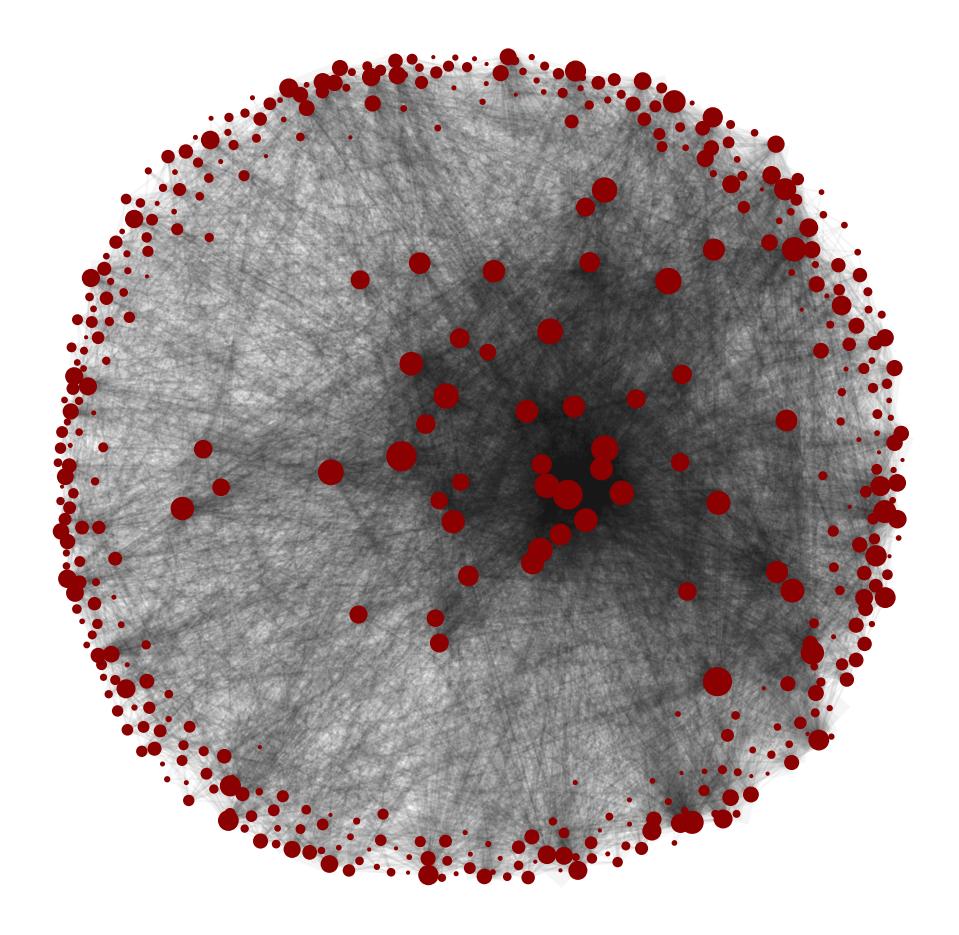

In [28]:
# Visualize the network
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)

pos = nx.spring_layout(g, k=3)
node_sizes = [g.degree[u] for u in g.nodes]
nx.draw_networkx_nodes(g, pos, node_size=node_sizes, node_color="darkred")

edge_widths = [d['weight'] for u, v, d in g.edges(data=True)]
nx.draw_networkx_edges(g, pos, width=edge_widths, alpha=0.04)

ax.axis('off')
plt.show()
